## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
students_df = pd.read_csv("students-data.csv", sep=';')
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
# Assigning index name to number
students_df.index.names = ['number']
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [6]:
# According to result above, there are no null values in the dataset.

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
# First Approach
student_sub_df1 = students_df.select_dtypes(exclude=[np.number])
student_sub_df1.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [8]:
# Print name of the columns
print(student_sub_df1.columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [9]:
# Second Approach
student_sub_df2 = students_df.select_dtypes(exclude=['int64'])
student_sub_df2.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [10]:
# Print name of the columns
print(student_sub_df2.columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [11]:
# Third Approach
student_sub_df3 = students_df.select_dtypes(include=["object"])
student_sub_df3.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [12]:
# Print name of the columns
print(student_sub_df3.columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [13]:
# Remove dependent Columns
students_df_1 = students_df.drop(["G3"], axis = 1)

students_sub_df1 = students_df_1.select_dtypes(include=[np.number])
students_sub_df1.head()

# Print Variance of variables
variance_ser = students_sub_df1.var()
print(variance_ser)

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
dtype: float64


In [14]:
# Identify variables with less than 1 variance
variance_ser_to_drop = pd.Series()
for i in range(len(variance_ser)):
    if(variance_ser[i] < 1) :
        variance_ser_to_drop = variance_ser_to_drop.append(pd.Series(variance_ser.index[i]))

variance_ser_to_drop

0    traveltime
0     studytime
0      failures
0        famrel
0      freetime
0          Dalc
dtype: object

In [15]:
# Drop variables with less than 1 Variance
students_df_new = students_df.drop(variance_ser_to_drop, axis = 1)
students_df_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [16]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
students_df_new['school'] = le.fit_transform(students_df_new['school'])
students_df_new['sex'] = le.fit_transform(students_df_new['sex'])
students_df_new['address'] = le.fit_transform(students_df_new['address'])
students_df_new['famsize'] = le.fit_transform(students_df_new['famsize'])
students_df_new['Pstatus'] = le.fit_transform(students_df_new['Pstatus'])
students_df_new['Mjob'] = le.fit_transform(students_df_new['Mjob'])
students_df_new['Fjob'] = le.fit_transform(students_df_new['Fjob'])
students_df_new['reason'] = le.fit_transform(students_df_new['reason'])
students_df_new['guardian'] = le.fit_transform(students_df_new['guardian'])
students_df_new['schoolsup'] = le.fit_transform(students_df_new['schoolsup'])
students_df_new['famsup'] = le.fit_transform(students_df_new['famsup'])
students_df_new['paid'] = le.fit_transform(students_df_new['paid'])
students_df_new['activities'] = le.fit_transform(students_df_new['activities'])
students_df_new['nursery'] = le.fit_transform(students_df_new['nursery'])
students_df_new['higher'] = le.fit_transform(students_df_new['higher'])
students_df_new['internet'] = le.fit_transform(students_df_new['internet'])
students_df_new['romantic'] = le.fit_transform(students_df_new['romantic'])

students_df_new.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [17]:
students_df_target =  students_df_new.copy()
students_df_target["Target"] = (students_df_new["G1"] >= 10)&(students_df_new["G2"] >= 10)&(students_df_new["G3"] >= 10)
students_df_target["Result"] = le.fit_transform(students_df_target["Target"])
students_df_target.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,goout,Walc,health,absences,G1,G2,G3,Target,Result
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,0,4,1,3,6,5,6,6,False,0
1,0,0,17,1,0,1,1,1,0,2,...,0,3,1,3,4,5,5,6,False,0
2,0,0,15,1,1,1,1,1,0,2,...,0,2,3,3,10,7,8,10,False,0
3,0,0,15,1,0,1,4,2,1,3,...,1,2,1,5,2,15,14,15,True,1
4,0,0,16,1,0,1,3,3,2,2,...,0,2,2,5,4,6,10,10,False,0
5,0,1,16,1,1,1,4,3,3,2,...,0,2,2,5,10,15,15,15,True,1
6,0,1,16,1,1,1,2,2,2,2,...,0,4,1,3,0,12,12,11,True,1
7,0,0,17,1,0,0,4,4,2,4,...,0,4,1,1,6,6,5,6,False,0
8,0,1,15,1,1,0,3,2,3,2,...,0,2,1,1,0,16,18,19,True,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [18]:
students_df_for_model = students_df_target.copy()
X = students_df_for_model.drop(["G3", "Target", "Result"], axis = 1)
Y = students_df_for_model["Result"]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

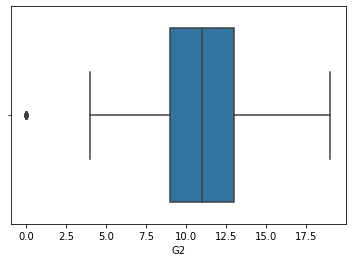

In [19]:
sns.boxplot(x='G2', data=students_df_new)
plt.show()

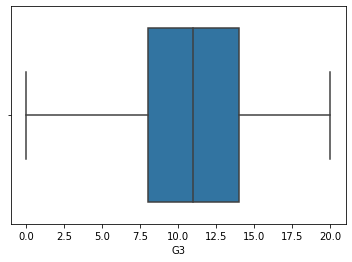

In [20]:
sns.boxplot(x='G3', data=students_df_new)
plt.show()


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


In [21]:
# G2 and G3 plots are very much simillar in nature and Central value, Quartile values are very much close for both of them. 
# i.e. They are highly correlated and G3 is highly dependent on G2. 

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

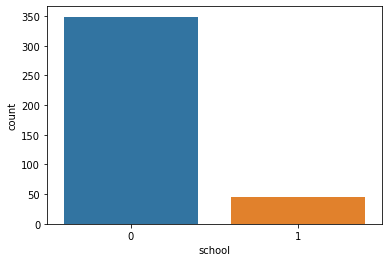

In [22]:
sns.countplot(x = "school" , data=students_df_new)
plt.show()

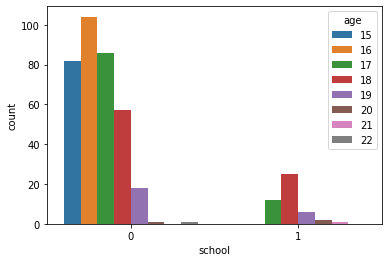

In [23]:
sns.countplot(x = "school" , hue = "age", data=students_df_new)
plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.24, random_state=4)

In [25]:
# Print NUmber of Training Records and Testing Records
print("Number of Train Records:", Y_train.size)
print("Number of Test Records:" , Y_test.size)

Number of Train Records: 300
Number of Test Records: 95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [26]:
# Making a logistic regression model
l_reg = LogisticRegression()
# Fitting the data
trained_model = l_reg.fit(X_train, Y_train)

C:\Users\Alok\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
# Predict the X_test data
Y_pred = l_reg.predict(X_test)
# calculate the accuracy
metrics.accuracy_score
print("Accuracy Score of Training Dataset:", metrics.accuracy_score(Y_train, trained_model.predict(X_train)))
print("Accuracy Score of Test Dataset:", metrics.accuracy_score(Y_test, Y_pred))
print("F1 Score :", metrics.f1_score(Y_test, Y_pred))

Accuracy Score of Training Dataset: 0.97
Accuracy Score of Test Dataset: 0.9263157894736842
F1 Score : 0.924731182795699


# Naive bayes with Iris data

### Import Iris.csv

In [28]:
iris_df = pd.read_csv("iris.csv")

In [29]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [31]:
iris_df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [32]:
# As there are few values which are NaN, we need to replace them
# We will replace them with mean of the corresponding column
iris_df.fillna(iris_df.mean(), inplace = True)

In [33]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.500000,3.000,5.200000,2.000000,Iris-virginica
148,149,6.200000,3.400,5.400000,2.300000,Iris-virginica
149,150,5.900000,3.000,5.100000,1.800000,Iris-virginica
150,151,5.900000,3.054,3.758667,1.202649,Iris-virginica
151,152,5.843709,3.054,3.758667,1.800000,Iris-virginica


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [34]:
# Check Unique values of Target column 
iris_df['Species'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
# Convert categorical variable to numeric
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'
iris_df['Species'] = label_encoder.fit_transform(iris_df['Species']) 

iris_df['Species'].unique()

array([0, 1, 2], dtype=int64)

In [36]:
X = iris_df.drop("Species", axis=1)
Y = iris_df["Species"]

### Find the distribution of target variable (Class)

In [37]:
iris_df["Species"].value_counts()

2    52
1    50
0    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

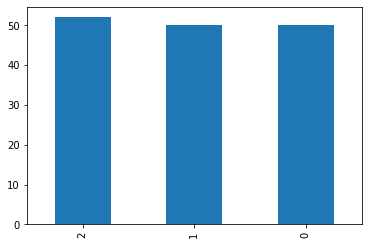

In [38]:
pd.value_counts(iris_df["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

[]

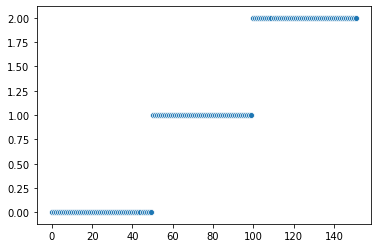

In [39]:
sns.scatterplot(data=iris_df["Species"])
plt.plot()

In [40]:
# According to above graph, we can conclude that 3 classes are completely different and uniquely distinguashable. 
# Even they are aproximately equally distributed in dataset i.e. dataset is not skewed towards any specific class of Species.

### Summary Statistics and explain insights for at least 2 variables

In [41]:
iris_df = iris_df.drop("Id", axis=1)
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,5.843709,3.054000,3.758667,1.202649,1.013158
std,0.822577,0.430713,1.752697,0.759657,0.821780
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
# Minimum SepalLength is 4.3 cm and Maximum SepalLength is 7.9 cm in the dataset
# Average SepalLength is 5.843709 cm
# 25% of the flowers have SepalLength less than 5.1 cm
# 50% of the flowers have SepalLength less than 5.8 cm 
# 75% of the flowers have SepalLength less than 6.4 cm 

In [43]:
# Minimum SepalWidth is 2.0 cm and Maximum SepalWidth is 4.4 cm in the dataset
# Average SepalWidth is 3.054000 cm
# 25% of the flowers have SepalWidth less than 2.8 cm
# 50% of the flowers have SepalWidth less than 3.0 cm 
# 75% of the flowers have SepalWidth less than 3.3 cm 

In [44]:
# Minimum PetalLength is 1.0 cm and Maximum PetalLength is 6.9 cm in the dataset
# Average PetalLength is 3.758667 cm
# 25% of the flowers have PetalLength less than 1.6 cm
# 50% of the flowers have PetalLength less than 4.3 cm 
# 75% of the flowers have PetalLength less than 5.1 cm 

In [45]:
# Minimum PetalWidth is 0.1 cm and Maximum PetalWidth is 2.5 cm in the dataset
# Average PetalWidth is 1.202649 cm
# 25% of the flowers have PetalWidth less than 0.3 cm
# 50% of the flowers have PetalWidth less than 1.3 cm 
# 75% of the flowers have PetalWidth less than 1.8 cm 

### Correlation among all variables and give your insights

In [46]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109368,0.871741,0.816256,0.775490
SepalWidthCm,-0.109368,1.000000,-0.420516,-0.355808,-0.415367
PetalLengthCm,0.871741,-0.420516,1.000000,0.960771,0.939813
PetalWidthCm,0.816256,-0.355808,0.960771,1.000000,0.951545
Species,0.775490,-0.415367,0.939813,0.951545,1.000000


In [47]:
# PetalWidth is strongly corellated with Target Column "Species"
# SepalWidth is weakly and inversely corellated with Target Column "Species"
# PetalLength and PetalWidth are strongly corelated with each other.
# PetalLength and PetalWidth are strong features which should be considered during classification. 

### Split data in Training and Validation in 80:20

In [48]:
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.20, random_state=1)

### Do Feature Scaling

In [49]:
# No need to use Standard Scaling for NaiveBayes Model

### Train and Fit NaiveBayes Model

In [50]:
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
test_pred = model.predict(test_set)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [52]:
model.score(train_set , train_labels) 

0.9917355371900827

In [53]:
print("Accuracy Score :", metrics.accuracy_score(test_labels, test_pred))
print("Confusion Matrix :")
print(metrics.confusion_matrix(test_labels, test_pred))

Accuracy Score : 1.0
Confusion Matrix :
[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [55]:
# According to above result, we can conclude that as accuracy score is 1, the model is highly overfit. 
# According to Confusion Matrix, there are all True Positives, which means model have correctly 
# classified the data into three classes without any errors.
# However, any overfit model would produce result on trained data, but will fail in production data.